In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns

In [4]:
venues_table = 'venues.xlsx'
venues = pd.read_excel(venues_table)
venues = venues[venues.relevance == 100]
path = 'http://dblp.org/db/'
venues = venues.url.apply(lambda v: v.replace(path, '')).values
venues

array(['conf/doa', 'conf/ecoop', 'conf/ecoop', 'conf/ecoop', 'conf/fmco',
       'conf/fmoods', 'conf/foveoos', 'conf/isorc', 'conf/oois',
       'conf/oopsla', 'conf/tools', 'journals/joop', 'journals/jot',
       'journals/oos'], dtype=object)

In [6]:
db = 'cache.sqlite'
connection = sqlite3.connect(db)
carriers = pd.read_sql('''select id, crossref, url from carrier''', connection)

def make_venue(row):
    if not row.crossref:
        return '/'.join(row.url.split('/')[1:-1])
    return '/'.join(row.crossref.split('/')[:-1])

carriers['venue'] = carriers.apply(make_venue, axis=1)
relevant_carriers = carriers[carriers.venue.isin(venues)]
relevant_carriers = relevant_carriers.rename(columns={'id': 'carrier_id'})

In [7]:
papers = pd.read_sql('select *, c.content as pdf_path from paper join cache c on pdf_record = c.id', connection)

In [8]:
result = papers.join(relevant_carriers, on='carrier_id',  rsuffix='_parent')
df = result[result.venue.notnull()]

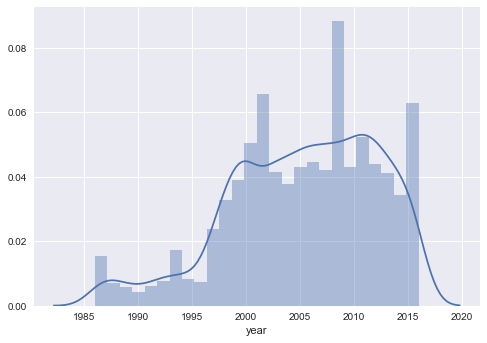

In [9]:
sns.distplot(df.year.apply(int))

Save intermediate Result:

<div class="alert alert-danger">
<h1>TODO</h1>
Some paths do not contain proper filenames, but HTML content. Clean it up    
</div>

In [13]:
import os
DIRECTORY = ''
filename = 'documents.txt'

paths = (value for value in df.pdf_path.values if not '<' in str(value))
with open(filename, 'w') as f:
    for path in map(str, paths):
        f.write(os.path.join(DIRECTORY, path.replace('.pdf', '.txt')) + '\n')